# Elección entre modelo aditivo o multiplicativo

* Cálculo de la tendencia anual y amplitud estacional
* Serie de tiempo a escala mensual

<font size = 5> Tendencia anual

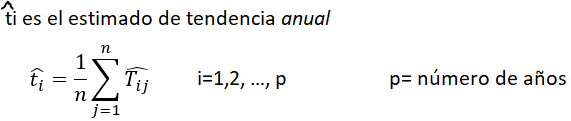

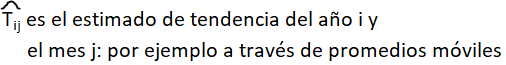


<font size = 5> Amplitud estacional

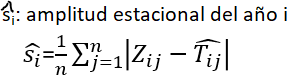

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv('/content/1.1_descomp_trend.txt', '\t')
df.tail(3)

,t,Zt
93,94,336.8
94,95,335.4
95,96,334.4


## 0. Índice de fechas.

Los datos no especifican una fecha de inicio, pero se sabe que son datos mensuales que empiezan en el año 1, el cual asumiremos como el año 2000.

In [ ]:
date = pd.date_range('01-01-2000', periods = len(df), freq = 'M')
ts = pd.DataFrame({'Zt': df['Zt'].values}, index = date)
ts.tail()

,Zt
2007-08-31,289.4
2007-09-30,329.9
2007-10-31,336.8
2007-11-30,335.4
2007-12-31,334.4


## 1. Tendencia anual-mensual   $T_{ij}$

* Media móviles centrada de 12 meses

In [ ]:
ts['Tij'] = pd.DataFrame(ts['Zt'].rolling(12, center = True).mean())
ts.head(12)

,Zt,Tij
2000-01-31,122.9,NaN
2000-02-29,164.1,NaN
2000-03-31,159.4,NaN
2000-04-30,168.5,NaN
2000-05-31,141.1,NaN
2000-06-30,136.8,NaN
2000-07-31,137.1,146.233333
2000-08-31,105.0,153.350000
2000-09-30,112.6,157.050000
2000-10-31,144.3,159.641667


## 2. Tendencia anual $t_{i}$

* Promedio anual de medias móviles

In [ ]:
ti = ts['Tij'].resample('Y').mean(); ti

2000-12-31    156.683333
2001-12-31    177.363194
2002-12-31    205.375694
2003-12-31    228.384722
2004-12-31    255.560417
2005-12-31    282.577778
2006-12-31    311.229167
2007-12-31    328.038095
Freq: A-DEC, Name: Tij, dtype: float64

* Agregar al dataframe, reemplazando los valores nulos con valores anteriores

In [ ]:
ts = pd.merge(left = ts, right = ti,    # Derecha: ts ; Izquierda; ti => izquierda se prueba con derecha
              right_index = True, left_index = True,  # Utilizar  ambos índices
              how = 'outer')       # Comparar ambos índices
ts.columns = ['Zt', 'Tij', 'ti']
# ts.tail(12)

In [ ]:
# si no se quisiese dejar lo nan
#ts['ti'] = ts['ti'].fillna(method='backfill')

In [ ]:
ts.head(12)

,Zt,Tij,ti
2000-01-31,122.9,NaN,NaN
2000-02-29,164.1,NaN,NaN
2000-03-31,159.4,NaN,NaN
2000-04-30,168.5,NaN,NaN
2000-05-31,141.1,NaN,NaN
2000-06-30,136.8,NaN,NaN
2000-07-31,137.1,146.233333,NaN
2000-08-31,105.0,153.350000,NaN
2000-09-30,112.6,157.050000,NaN
2000-10-31,144.3,159.641667,NaN


## 3. Amplitud estacional

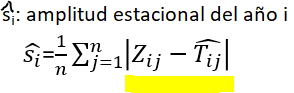

In [ ]:
ts['Zt_Tij'] = abs(ts['Zt'] - ts['Tij'])
ts.tail(12)

,Zt,Tij,ti,Zt_Tij
2007-01-31,345.0,325.141667,NaN,19.858333
2007-02-28,348.9,326.225000,NaN,22.675000
2007-03-31,349.0,325.625000,NaN,23.375000
2007-04-30,366.9,327.283333,NaN,39.616667
2007-05-31,330.9,328.116667,NaN,2.783333
2007-06-30,323.1,331.025000,NaN,7.925000
2007-07-31,304.5,332.850000,NaN,28.350000
2007-08-31,289.4,NaN,NaN,NaN
2007-09-30,329.9,NaN,NaN,NaN
2007-10-31,336.8,NaN,NaN,NaN


Promedio anuales de dichas diferencias

In [ ]:
si = ts['Zt_Tij'].resample('Y').mean(); si

2000-12-31    26.075000
2001-12-31    18.932639
2002-12-31    20.060417
2003-12-31    18.319444
2004-12-31    16.897917
2005-12-31    15.186111
2006-12-31    15.900000
2007-12-31    20.654762
Freq: A-DEC, Name: Zt_Tij, dtype: float64

In [ ]:
ts = pd.merge(left = ts, right = si,  
              right_index = True, left_index = True,
              how = 'outer')
ts.columns = ['Zt', 'Tij', 'ti', 'Zt_Tij', 'si']
ts.tail(12)

,Zt,Tij,ti,Zt_Tij,si
2007-01-31,345.0,325.141667,NaN,19.858333,NaN
2007-02-28,348.9,326.225000,NaN,22.675000,NaN
2007-03-31,349.0,325.625000,NaN,23.375000,NaN
2007-04-30,366.9,327.283333,NaN,39.616667,NaN
2007-05-31,330.9,328.116667,NaN,2.783333,NaN
2007-06-30,323.1,331.025000,NaN,7.925000,NaN
2007-07-31,304.5,332.850000,NaN,28.350000,NaN
2007-08-31,289.4,NaN,NaN,NaN,NaN
2007-09-30,329.9,NaN,NaN,NaN,NaN
2007-10-31,336.8,NaN,NaN,NaN,NaN


## 4. Análisis si vs ti

Text(0.5, 0, 'ti')

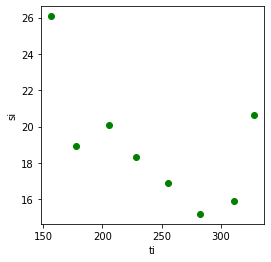

In [ ]:
fig, ax = plt.subplots(1, figsize = (4,4))
ax.plot(ti, si, 'og')
ax.set_ylabel('si'); ax.set_xlabel('ti')

* No se observa un comportamiento constante horizontal entre ti y si, por lo que la componente de tendencia y estacional no son independientes.
* Se recomienda utilizar modelo multiplicativo